In [32]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import seaborn as sns 
plt.style.use('ggplot')

In [33]:
fake_df = pd.read_csv('D:\VS CODE\Python\Fake.csv')
real_df = pd.read_csv('D:\VS CODE\Python\True.csv')

In [34]:
fake_df.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [35]:
fake_df.subject.unique()

array(['News', 'politics', 'Government News', 'left-news', 'US_News',
       'Middle-east'], dtype=object)

In [36]:
real_df.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [37]:
real_df.subject.unique()

array(['politicsNews', 'worldnews'], dtype=object)

In [38]:
fake_df.drop(['date', 'subject'], axis=1, inplace=True)
real_df.drop(['date', 'subject'], axis=1, inplace=True)

In [39]:
fake_df['class'] = 0 
real_df['class'] = 1

In [40]:
print("Original 'Fake' and 'True' dataframes have the shapes:", fake_df.shape, " and ", real_df.shape, "respectively.")

Original 'Fake' and 'True' dataframes have the shapes: (23481, 3)  and  (21417, 3) respectively.


In [41]:
fake_df["label"] = "1"
real_df["label"] = "0"
df = pd.concat([fake_df, real_df])
df = df.sample(frac=1).reset_index(drop=True)

print("Combined dataframe has shape of ", df.shape)
df.head(3)

Combined dataframe has shape of  (44898, 4)


,title,text,class,label
0,South Korea says will provide financial suppor...,SEOUL (Reuters) - South Korea will provide add...,1,0
1,Trump fires back at Britain's May: 'Don't focu...,WASHINGTON (Reuters) - U.S. President Donald T...,1,0
2,Soul-searching at France's FN: far-right party...,"NANTERRE, France (Reuters) - Who are you and w...",1,0


In [42]:
df.describe()

,class
count,44898.000000
mean,0.477015
std,0.499477
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [43]:
df.isnull().sum()

title    0
text     0
class    0
label    0
dtype: int64

Text(0, 0.5, 'Proportion of News Articles')

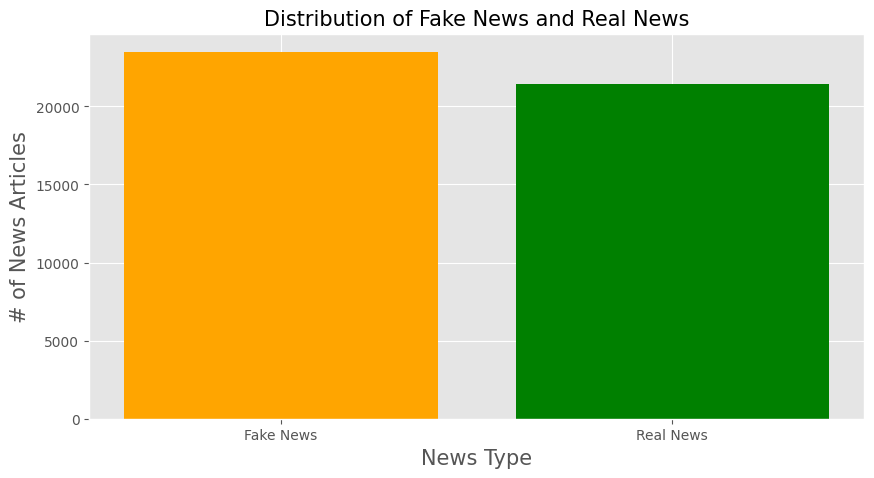

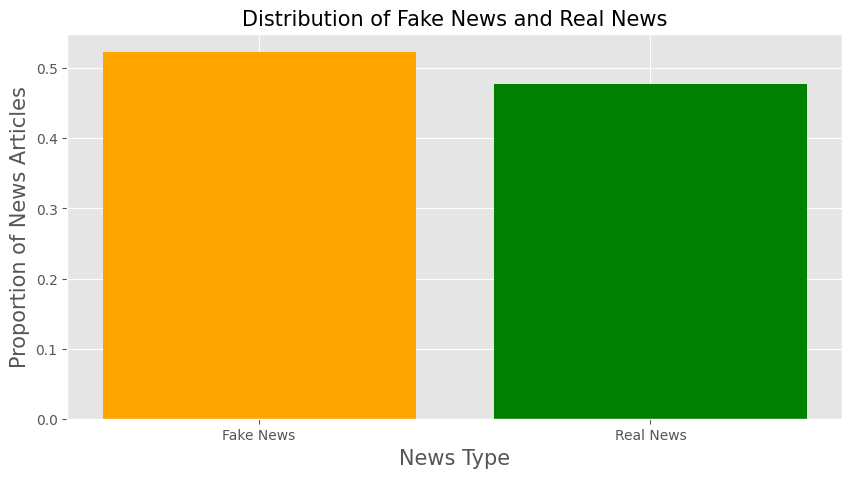

In [44]:
plt.figure(figsize=(10, 5))
plt.bar('Fake News', len(fake_df), color='orange')
plt.bar('Real News', len(real_df), color='green')
plt.title('Distribution of Fake News and Real News', size=15)
plt.xlabel('News Type', size=15)
plt.ylabel('# of News Articles', size=15)


total_len = len(fake_df) + len(real_df)
plt.figure(figsize=(10, 5))
plt.bar('Fake News', len(fake_df) / total_len, color='orange')
plt.bar('Real News', len(real_df) / total_len, color='green')
plt.title('Distribution of Fake News and Real News', size=15)
plt.xlabel('News Type', size=15)
plt.ylabel('Proportion of News Articles', size=15)

In [45]:
print('Difference in news articles:',len(fake_df)-len(real_df))

Difference in news articles: 2064


In [46]:
X = pd.DataFrame(df["text"])
y = pd.DataFrame(df["label"])
X.shape, y.shape

((44898, 1), (44898, 1))

In [47]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=7)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((35918, 1), (8980, 1), (35918, 1), (8980, 1))

In [48]:
vectorizer = TfidfVectorizer()

# transforming
tfidf_train = vectorizer.fit_transform(x_train.iloc[:,0])
tfidf_test = vectorizer.transform(x_test.iloc[:,0])

In [49]:
tfidf_train.shape, tfidf_test.shape

((35918, 112106), (8980, 112106))

In [50]:
pac = PassiveAggressiveClassifier(random_state = 7,loss = 'squared_hinge',  max_iter = 50, C = 0.16)
pac.fit(tfidf_train, y_train.values.ravel())

#Predict on the test set and calculate accuracy
y_pred = pac.predict(tfidf_test)
score = accuracy_score(y_test, y_pred)

print(f'Accuracy: {round(score*100, 2)}%')

Accuracy: 99.59%


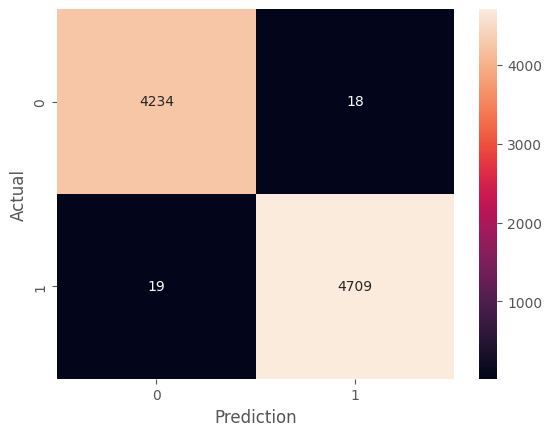

In [51]:
ax = sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt="d")
ax.set(xlabel='Prediction', ylabel='Actual')
plt.show()